<a href="https://colab.research.google.com/github/krakowiakpawel9/computer-vision-course/blob/master/02_document-scanner/01_rectangle-detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Wykrywanie prostokątnych obiektów z obrazu**

Celem tego notebook'a jest zrozumienie podstaw detekcji elementów z obrazu. 

#### **Spis treści:**
1. [Import bibliotek](#a0)
2. [Wczytanie obrazu](#a1)
3. [Konwersja do odcieni szarości](#a2)
4. [Detekcja krawędzi](#a3)
5. [Detekcja konturu](#a4)
6. [Detekcja prostokąta](#a5)
7. [Wyświetlenie znalezionego kształtu](#a6)

#### **Uwagi:**
>Kurs został stworzony przy pomocy biblioteki w wersji 4.1.2.  
>Aby zaktualizować bibliotekę OpenCV do aktualniej wersji należy użyć polecenia:
```
!pip install --upgrade opencv-python
```
Bądź zainstalować wybierając konkretną wersję, np.
```
!pip install opencv-python==4.1.2.30
```

In [0]:
# !pip -q install --upgrade opencv-python

### <a name='a0'></a> Import bibliotek

In [2]:
import cv2
from google.colab.patches import cv2_imshow
import imutils

print(cv2.__version__)

3.4.3


### <a name='a1'></a> Wczytanie obrazu

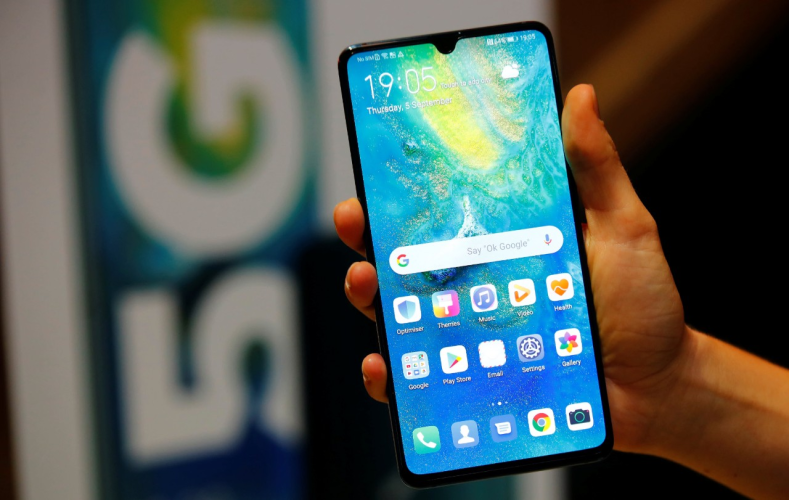

In [3]:
image = cv2.imread('phone.jpg')
image = imutils.resize(image, height=500)
cv2_imshow(image)

### <a name='a2'></a> Konwersja do odcieni szarości

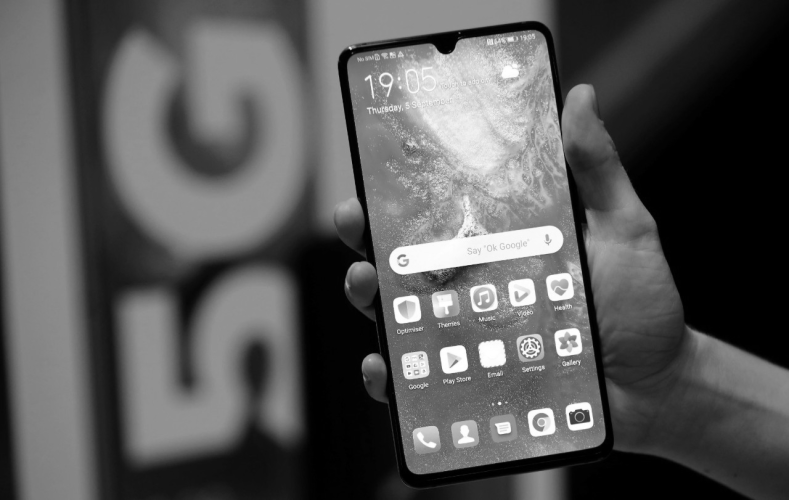

In [4]:
gray_image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

### <a name='a3'></a> Detekcja krawędzi

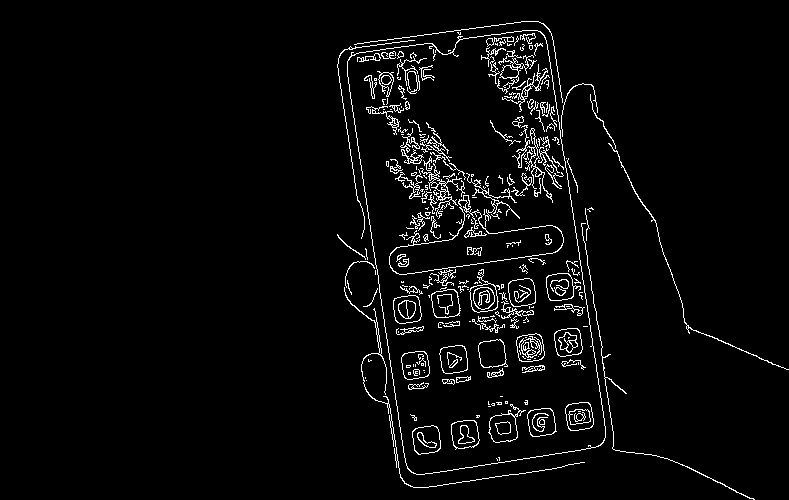

In [5]:
edges1 = cv2.Canny(image=gray_image, threshold1=70, threshold2=200)
cv2_imshow(edges1)

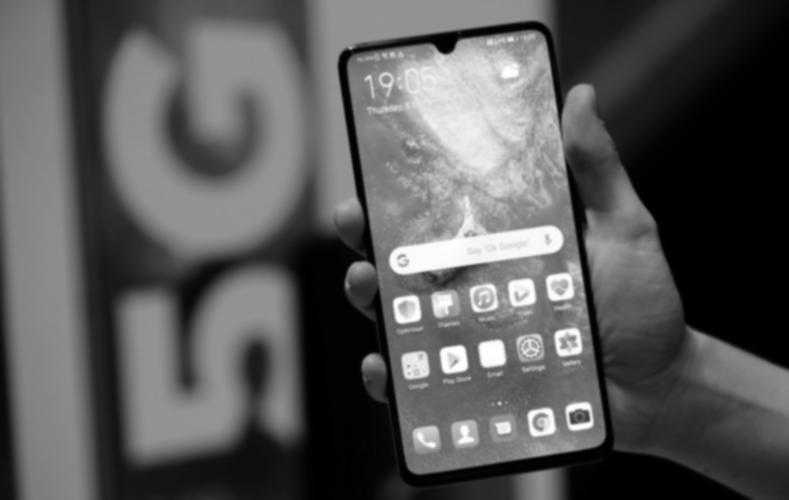

In [6]:
gray_image = cv2.GaussianBlur(src=gray_image, ksize=(5, 5), sigmaX=0)
cv2_imshow(gray_image)

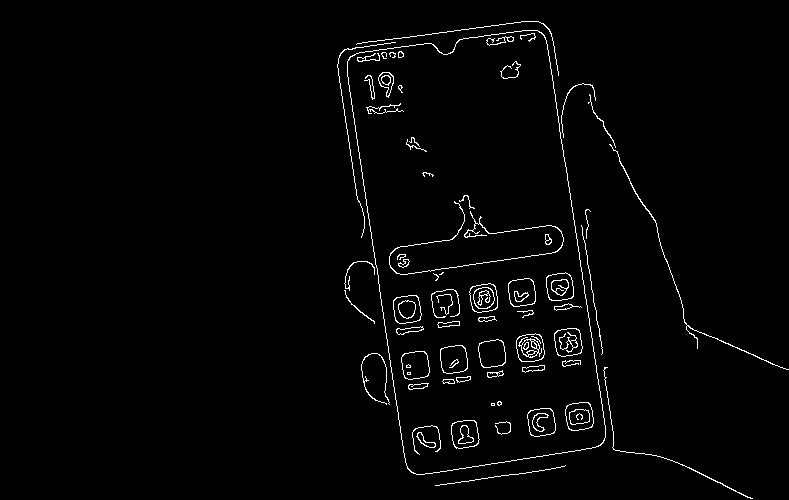

In [7]:
edges = cv2.Canny(image=gray_image, threshold1=70, threshold2=200)
cv2_imshow(edges)

### <a name='a4'></a> Detekcja konturu

In [0]:
contours = cv2.findContours(image=edges.copy(), mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

screen_contour = None

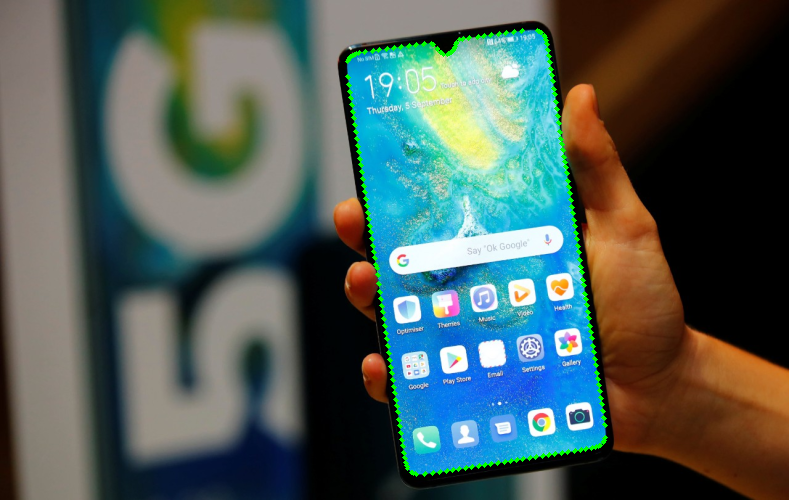

In [9]:
cnt1 = cv2.drawContours(image=image.copy(), contours=contours[0], contourIdx=-1, color=(0, 255, 0), thickness=3)
cv2_imshow(cnt1)

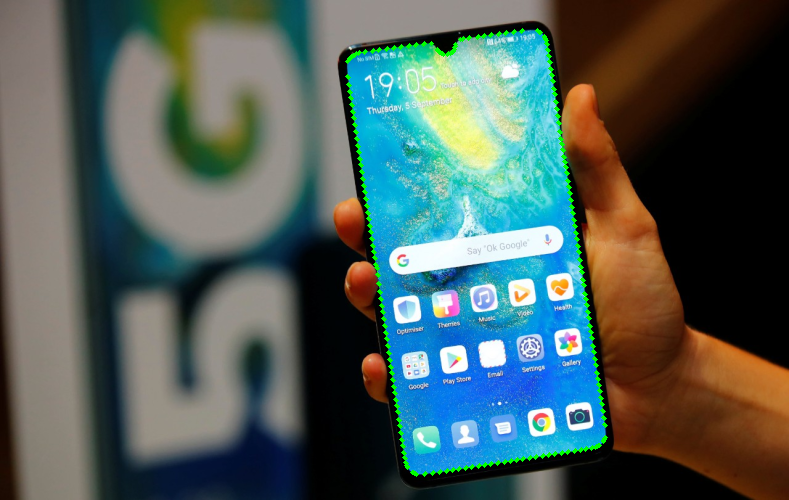

In [10]:
cnt2 = cv2.drawContours(image=image.copy(), contours=contours[1], contourIdx=-1, color=(0, 255, 0), thickness=3)
cv2_imshow(cnt2)

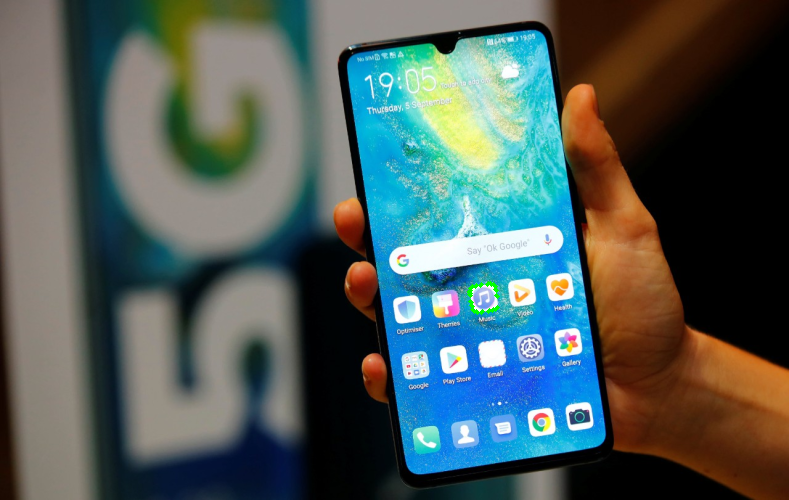

In [11]:
cnt3 = cv2.drawContours(image=image.copy(), contours=contours[2], contourIdx=-1, color=(0, 255, 0), thickness=3)
cv2_imshow(cnt3)

### <a name='a5'></a> Detekcja prostokąta

In [0]:
for contour in contours:
    perimeter = cv2.arcLength(curve=contour, closed=True)
    approx = cv2.approxPolyDP(curve=contour, epsilon=0.015 * perimeter, closed=True)

    if len(approx) == 4:
        screen_contour = approx
        break

In [13]:
screen_contour

array([[[537,  30]],

       [[347,  61]],

       [[416, 474]],

       [[605, 437]]], dtype=int32)

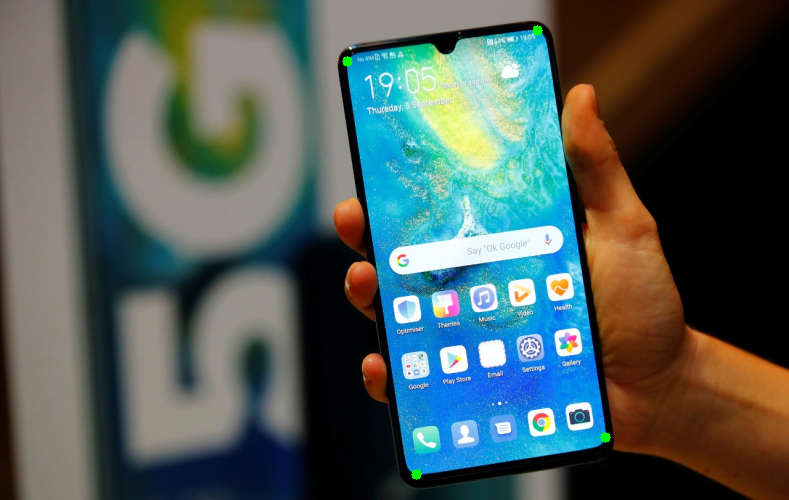

In [14]:
vertices = cv2.drawContours(image=image.copy(), contours=screen_contour, contourIdx=-1, color=(0, 255, 0), thickness=10)
cv2_imshow(vertices)

### <a name='a6'></a> Wyświetlenie znalezionego kształtu

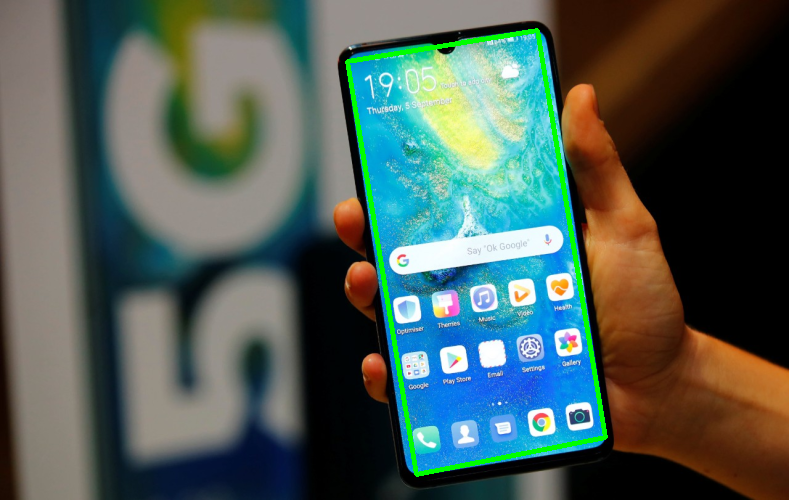

In [15]:
screen_contour = cv2.drawContours(image=image.copy(), contours=[screen_contour], contourIdx=-1, color=(0, 255, 0), thickness=3)
cv2_imshow(screen_contour)